# Basic statistics

In this part, we will look at some distributions and statistics, which may be useful for the first glance at the current corpora.

1) Corpora size

2) Distribution by the number of words in one tweet.

3) Most common words with stopwords.

4) Most common words without stopwords.

5) Wordcloud.

In [9]:
from google.colab import drive
import os
import pandas as pd
import seaborn as sns
import itertools
import collections
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
clean_tweets = pd.read_csv('/content/gdrive/My Drive/Corpus_project/basic_cleaning_tweets.csv') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(clean_tweets['tweet']) # number of tweets

702804

In [4]:
len(clean_tweets['tweet'][0].split()) # number of words in tweet

9

In [5]:
clean_tweets = clean_tweets.dropna()

In [6]:
all_tweets = clean_tweets['tweet'].to_list()

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets]

In [ ]:
len_of_words = [len(tweet) for tweet in words_in_tweet]
len_of_words[:5]

Text(0.5, 0, 'Number of tweets')

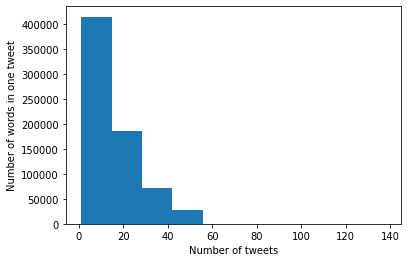

In [16]:
plt.hist(len_of_words)
plt.ylabel('Number of words in one tweet')
plt.xlabel('Number of tweets')

In [ ]:
# List of all words across tweets
all_words = list(itertools.chain(*words_in_tweet))

In [ ]:
# Create counter
counts = collections.Counter(all_words)

counts.most_common(10)

[('и', 300653),
 ('я', 289405),
 ('в', 276036),
 ('не', 240821),
 ('что', 171297),
 ('на', 151847),
 ('с', 139217),
 ('а', 97325),
 ('как', 82603),
 ('это', 80837)]

In [ ]:
clean_tweets_prom = pd.DataFrame(counts.most_common(15), columns=['words', 'count'])
clean_tweets_prom.head()

,words,count
0,и,300653
1,я,289405
2,в,276036
3,не,240821
4,что,171297


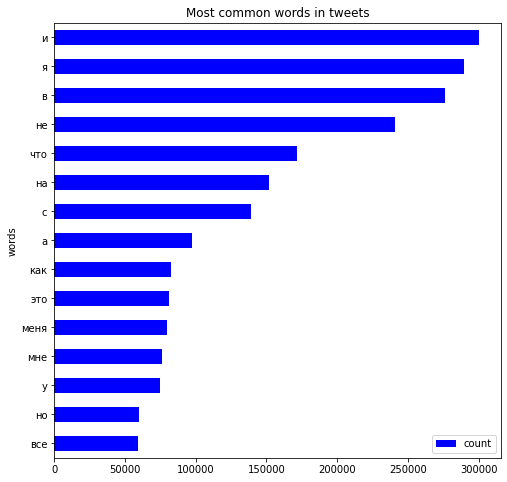

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_prom.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Most common words in tweets")

plt.show()

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
list(stop_words)[:15]

['нее',
 'раз',
 'у',
 'потом',
 'моя',
 'когда',
 'есть',
 'только',
 'этом',
 'со',
 'уж',
 'для',
 'к',
 'мне',
 'вас']

In [ ]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

In [ ]:
counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('это', 80837),
 ('-', 57127),
 ('хочу', 35202),
 ('просто', 32437),
 ('год', 30871),
 ('новый', 25106),
 ('ещё', 24358),
 ('очень', 23530),
 ('сегодня', 20833),
 ('блять', 17989),
 ('всё', 17448),
 ('новым', 16823),
 ('почему', 16160),
 ('могу', 15214),
 ('люблю', 14397)]

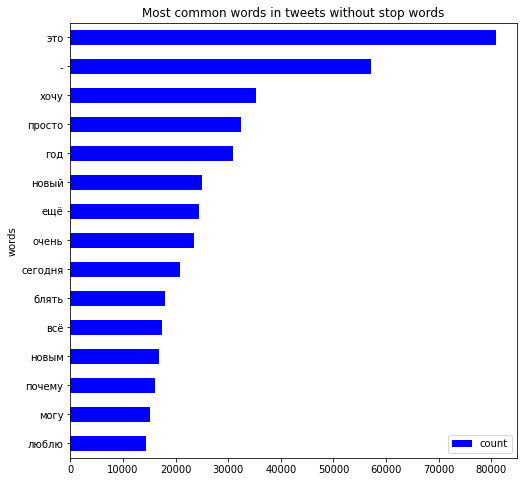

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Most common words in tweets without stop words")

plt.show()

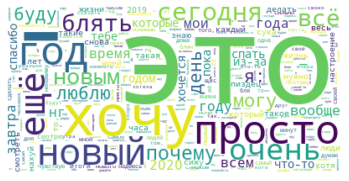

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=1000).generate_from_frequencies(counts_nsw)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()